In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import os


import numpy as np

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import tree as cart_tree
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import graphviz 

from utils import decisionTreeConstraint, predict, export_graphviz_cp

plt.style.use('classic')



# Zoo Dataset

In [3]:
dataset=pd.read_table("data_simple_tests/zoo.data",delimiter=',',names=['hair','feathers','eggs','milk','airborne','aquatic' ,'predator' ,'toothed','backbone','breathes','venomous','fins','legs','tail','domestic',
                       'catsize','type'])
Y =dataset['type'].values
dm=pd.get_dummies(dataset['legs'],drop_first=False,prefix='legs')

dataset=dataset.drop('legs',axis=1)
dataset=dataset.drop('type',axis=1)
dataset=pd.concat([dataset,dm],axis=1)

X =dataset.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, stratify=Y)

C=np.unique(y_train)
lb=LabelBinarizer()
lb.fit(C)
y_train_ohot=lb.transform(y_train)
y_test_ohot=lb.transform(y_test)
if len(C)==2:
    y_train_ohot= np.hstack((1-y_train_ohot, y_train_ohot))
    y_test_ohot= np.hstack((1-y_test_ohot, y_test_ohot))

N = X_train.shape[0]
M = X_train.shape[1]
unique=[np.unique(X_train[:,i]) for i in range(M)]
dataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
aardvark,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
antelope,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
bass,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
bear,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
boar,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [4]:
leaves = 6
depth_k = 3
V = 2
max_time = 60

#CPTree Learning
tree, optimal, ttime =decisionTreeConstraint(L= leaves, K= depth_k, V = V, max_time=max_time, X=X_train, Y=y_train_ohot,
                             colnames= list(dataset),
                        classnames=["Mammal","Bird","Reptile","Fish","Amphibian","Bug","Invertebrate"],imbalanced=False, C = C)
#CPTree predictions
y_pre_test = [predict(tree,X_test[i,:]) for i in range(X_test.shape[0])]
y_pre_train = [predict(tree,X_train[i,:]) for i in range(X_train.shape[0])]

#CPTree Score
test_accuracy = accuracy_score(y_pre_test,np.argmax(y_test_ohot,axis=1))
train_accuracy = accuracy_score(y_pre_train,np.argmax(y_train_ohot,axis=1))

print(f"CPTree accuracy: {test_accuracy}")
print(f"Optimality: {optimal}")

CPTree accuracy: 0.8529411764705882
Optimality: Optimal


# CPTree visualisation

In [5]:
tree1 = export_graphviz_cp(tree)
tree1.render("zoo") 

'zoo.png'

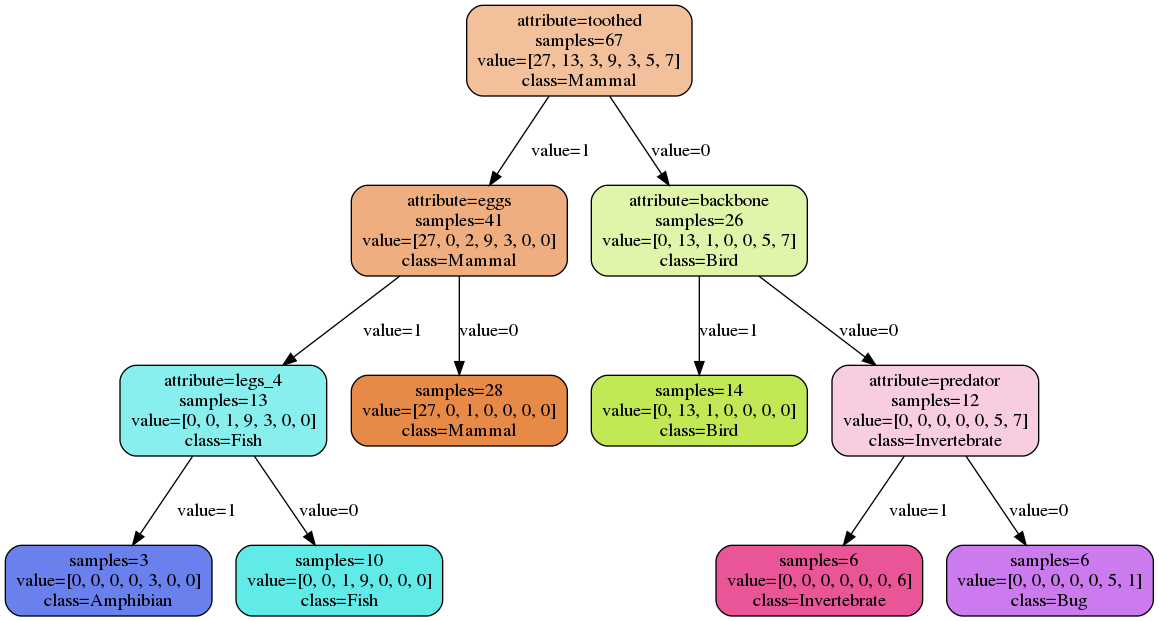

In [6]:
from IPython.display import Image
Image(filename='zoo.png') 